<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>
<hr/>

# Notwendige Imports für dieses Notebook

In [3]:
try:
    import plotly.express as px
except ImportError as e:
    !pip install "plotly>=5.0"

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns

pio.renderers.default = 'notebook'


from os.path import exists

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# Laden des Datensatzes

In [4]:
def load_crimes():
    local = "crime.csv.zip"
    if exists(local):
        print("Read from local file")
        return pd.read_csv(local, compression="zip")
    else:
        print("Read from hu-box")
        return pd.read_csv(
            "https://box.hu-berlin.de/f/d0c59bb99af24dbf9c81/?dl=1", compression="zip"
        )


df = load_crimes()

# fill missing values
df.SHOOTING = df.SHOOTING.fillna("N")

# Replace -1 values in Lat/Long with Nan
df.Lat = df.Lat.replace(-1, np.nan)
df.Long = df.Long.replace(-1, np.nan)
df["OCCURRED_ON_DATE"] = pd.to_datetime(df["OCCURRED_ON_DATE"])

df = df.convert_dtypes()
df.head()

Read from local file


INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING    OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808        N 2018-09-02 13:00:00  2018      9   
1      C11            347        N 2018-08-21 00:00:00  2018      8   
2       D4            151        N 2018-09-03 19:27:00  2018      9   
3       D4            272        N 2018-09-03 21:16:00  2018      9   
4       B3            421        N 2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821   -71.0603   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [3]:
# List the data types of each column
df.dtypes

INCIDENT_NUMBER        string[python]
OFFENSE_CODE                    Int64
OFFENSE_CODE_GROUP     string[python]
OFFENSE_DESCRIPTION    string[python]
DISTRICT               string[python]
REPORTING_AREA         string[python]
SHOOTING               string[python]
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            Int64
MONTH                           Int64
DAY_OF_WEEK            string[python]
HOUR                            Int64
UCR_PART               string[python]
STREET                 string[python]
Lat                           Float64
Long                          Float64
Location               string[python]
dtype: object

# Show the Crimes on OpenStreetMap

In [5]:
# Drop NAN and sample to 10k samples to avoid excessive memory usage
data = df.dropna(subset=["Lat", "Long", "DISTRICT"]).sample(n=10_000)

fig = px.scatter_map(
    data,
    lat="Lat",
    lon="Long",
    color="DISTRICT",
    zoom=10,
)

fig.update_layout(
    font_family="serif",
    title_font_size=24,
    title_font_weight="bold",
    width=1000,
    height=500,
    mapbox_style=None,
    title=dict(text="Crimes by District", font=dict(size=24)),
    title_subtitle=dict(text="Boston is divided into 12 Discricts", font=dict(size=18)),
)

fig.show()

# Informationen

In [6]:
df.describe()

OFFENSE_CODE               OCCURRED_ON_DATE         YEAR     MONTH  \
count      319073.0                         319073     319073.0  319073.0   
mean    2317.546956  2017-01-25 11:54:00.922723072  2016.560586  6.609719   
min           111.0            2015-06-15 00:00:00       2015.0       1.0   
25%          1001.0            2016-04-12 01:23:00       2016.0       4.0   
50%          2907.0            2017-01-28 03:17:00       2017.0       7.0   
75%          3201.0            2017-11-05 18:14:00       2017.0       9.0   
max          3831.0            2018-09-03 21:25:00       2018.0      12.0   
std     1185.285543                            NaN     0.996344  3.273691   

            HOUR        Lat       Long  
count   319073.0   298329.0   298329.0  
mean   13.118205  42.322298  -71.08285  
min          0.0  42.232413 -71.178674  
25%          9.0  42.297555 -71.097193  
50%         14.0   42.32561 -71.077562  
75%         18.0  42.348624 -71.062563  
max         23.0  42.395042 -70.963676  
std     6.294205   0.031881   0.029771

In [7]:
df.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    2
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18177
Long                    18177
Location                18194
dtype: int64

# Selektion / Filter

In [8]:
df[(df.UCR_PART == "Part One")].INCIDENT_NUMBER.count()

np.int64(61629)

# Gruppierungen und Aggregation

In [9]:
df.groupby("YEAR").INCIDENT_NUMBER.count()

YEAR
2015     53388
2016     99114
2017    100886
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

## Alternative

In [10]:
df.groupby("YEAR")[["INCIDENT_NUMBER"]].count()

INCIDENT_NUMBER
YEAR                 
2015            53388
2016            99114
2017           100886
2018            65685

## Sorting

In [11]:
df.sort_values(by="YEAR", ascending=False).head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
31          I182070900          2629         Harassment   
319042   I110611058-00          3125    Warrant Arrests   
55          I182070873          3625              Other   
7           I182070932          3301    Verbal Disputes   
30          I182070901          2907         Violations   

                     OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
31                            HARASSMENT       B3            464        N   
319042                    WARRANT ARREST       A1                       N   
55      DANGEROUS OR HAZARDOUS CONDITION       B2            327        N   
7                         VERBAL DISPUTE       B2            584        N   
30       VAL - OPERATING AFTER REV/SUSP.       B3            428        N   

          OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
31     2018-09-03 18:17:00  2018      9      Monday    18    Part Two   
319042 2018-08-29 17:00:00  2018      8   Wednesday    17  Part Three   
55     2018-09-03 15:38:00  2018      9      Monday    15  Part Three   
7      2018-09-03 20:39:37  2018      9      Monday    20  Part Three   
30     2018-09-03 18:41:00  2018      9      Monday    18    Part Two   

                STREET        Lat       Long                     Location  
31      HANSBOROUGH ST  42.288104 -71.091533  (42.28810362, -71.09153335)  
319042    CAMBRIDGE ST       <NA>       <NA>     (0.00000000, 0.00000000)  
55          WAYLAND ST  42.313689 -71.074271  (42.31368925, -71.07427080)  
7              LAWN ST  42.327016 -71.105551  (42.32701648, -71.10555088)  
30        CLARKWOOD ST  42.280137 -71.090798  (42.28013735, -71.09079826)

### Documentation: https://pandas.pydata.org

# Plotting with Seaborn

In [12]:
# First filter some data
data = df[(df.UCR_PART == "Part One") & (df.YEAR == 2016)]

# Plot some data
g = sns.catplot(
    x="DAY_OF_WEEK",
    kind="count",
    height=2,
    aspect=3.0,
    data=data,
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

# add title
g.fig.text(
    0.12,
    1.2,
    "Total number of offences by weekday.",
    fontsize=18,
    fontweight="bold",
    fontfamily="serif",
)
g.fig.text(
    0.12,
    1.05,
    "Crime Rates reach its high on Fridays",
    fontsize=14,
    fontweight="light",
    fontfamily="serif",
)

# annotate plot
plt.annotate(
    "Highest\n crime\n rates",
    xy=(4, 2900),
    xytext=(5, 3000),
    arrowprops=dict(
        facecolor="steelblue", arrowstyle="->", connectionstyle="arc3,rad=.3"
    ),
    fontsize=10,
    fontfamily="monospace",
    ha="left",
)

plt.show()

In [13]:
# First filter some data
data = df[(df.UCR_PART == "Part One")].dropna(subset=["Lat", "Long"])

# Plot some data
g = sns.relplot(x="Lat", y="Long", col="YEAR", alpha=0.01, data=data)

# add title
g.fig.text(
    0.05,
    1.15,
    "Urban areas, broken down by year",
    fontsize=34,
    fontweight="bold",
    fontfamily="serif",
)
g.fig.text(
    0.05,
    1.05,
    "Most crimes in the eastern city part?",
    fontsize=26,
    fontweight="light",
    fontfamily="serif",
)

# annotate plot
for axes in g.axes:
    for ax in axes:
        ax.annotate(
            "Is this the\ncrime hotspot?",
            xy=(42.36, -71.075),
            xytext=(42.36, -71.155),
            arrowprops=dict(
                facecolor="steelblue", arrowstyle="->", connectionstyle="arc3,rad=-.3"
            ),
            fontsize=10,
            fontfamily="monospace",
            ha="left",
        )


sns.despine()
plt.show()

### Documentation: https://seaborn.pydata.org

<hr>

# Your Solutions - Submit via Moodle

<hr/>


<div class="alert alert-block alert-success" style="margin-top: 20px">

<h1>1. Classify Columns</h1>

<h2>a) Classify the data types of each column</h2>
<ul>
<li><strong>Numerical</strong>
<ul>
<li>Continuous or Discrete</li></ul>
</li>
<li><strong>Categorical</strong>
<ul>
<li>Nominal or Ordinal</li></ul>
</li>
</ul>

<b>If a column is discrete or ordinal:
State the reason for your decision</b>

</div>

# Answer
- INCIDENT_NUMBER, Categorical
- OFFENSE_CODE, Categorical
- OFFENSE_CODE_GROUP, Categorical
- OFFENSE_DESCRIPTION, Categorical
- DISTRICT, Categorical
- REPORTING_AREA, Categorical
- SHOOTING, Categorical
- OCCURRED_ON_DATE, Numerical
- YEAR, Numerical
- MONTH, Numerical, Discrete, Months have different sizes, 1/2 Month is not defined
- DAY_OF_WEEK, Categorical, Ordinal, Has natural order (Mon, Tue,...)
- HOUR, Numerical
- UCR_PART, Categorical, Ordinal, Has order (Serious to light)
- STREET, Categorical
- Lat, Numerical
- Long, Numerical
- Location, Numerical

<hr/> 

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h1>2. Key Questions:</h1>

<p>Your aim is to support the police by developing preventive measures based on historical data from 2015-2018.</p>

<ol>
<li><p><strong>How has the total number of offences developed over the years?</strong></p>

<ul>
<li>Which offences are the most frequent?</li>

<li>How has the number of serious crimes ('Part One') developed over the years?</li>

<li>Why is the total number of offences (so) low in 2015 and 2018?</li></ul></li>

<br/>

<li><p><strong>In which urban areas (district), broken down by year, were most crimes committed?</strong></p>

<ul>
<li>In which urban areas (district) are most serious crimes ('Part One') committed? </li>

<li>Which types of serious crimes ('Part One') occur most frequently in the urban area 'B2'? </li></ul></li>

<br/>

<li><p><strong>Are there (a) times, (b) days or (c) months when more serious crimes ('Part One') occur?</strong></p>

<ul>
<li>Do crimes tend to occur at night or during the day?</li>

<li>When are the most police officers needed?</li></ul></li>

<br/>

<li><p><strong>How has the number of shootings developed in recent years?</strong></p>

<ul>
<li>In which district do most shootings take place?</li>

<li>In which street do most shootings take place?</li>

<li>At what times do most shootings take place?</li></ul></li>
</ol>
    
</div> 

<hr/>

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 1:</h1>

<h2>How has the total number of offences developed over the years?</h2>
    
</div>

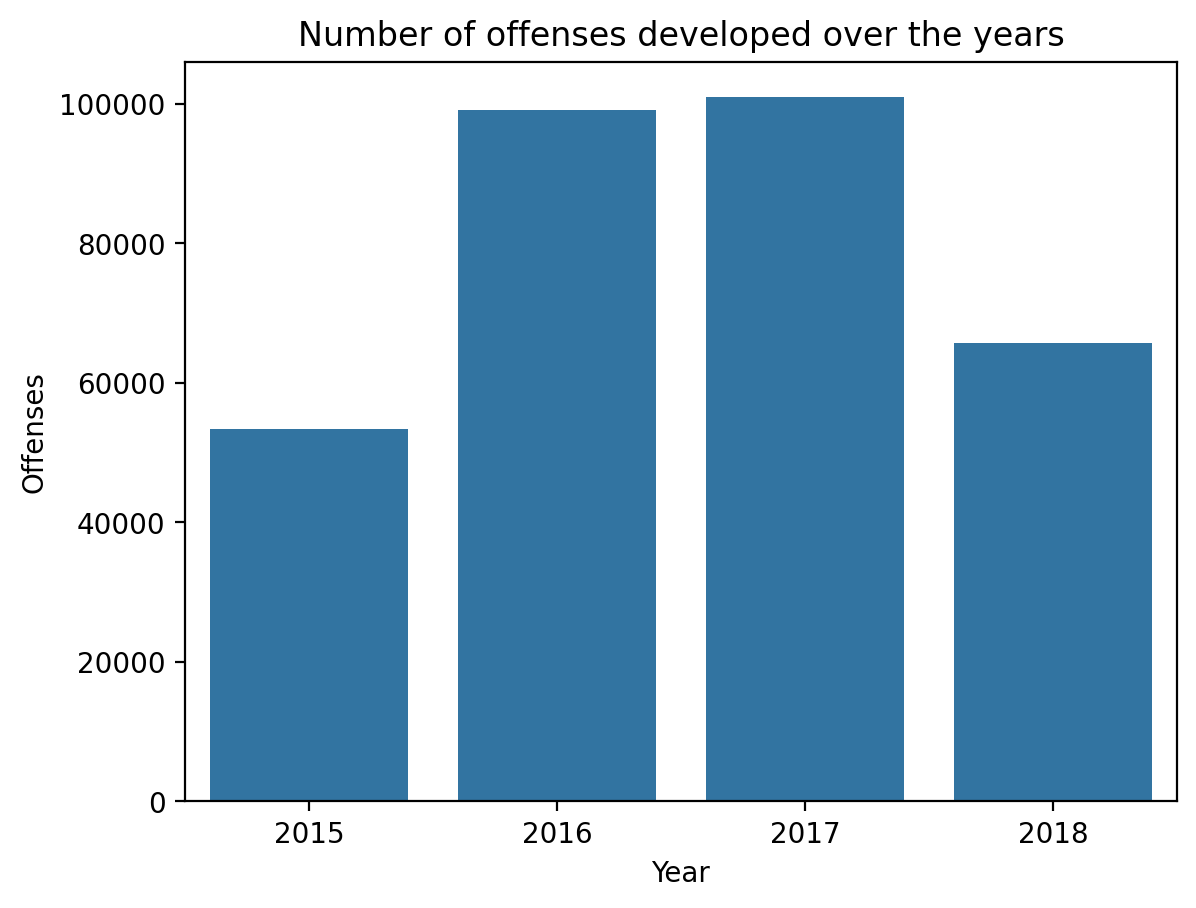

In [14]:
# Answer / Code / etc
incidentsByYear = df.groupby("YEAR")[["INCIDENT_NUMBER"]].count()
sns.barplot(
    data=incidentsByYear, x=incidentsByYear.index, y=incidentsByYear.INCIDENT_NUMBER
)
plt.title("Number of offenses developed over the years")
plt.ylabel("Offenses")
plt.xlabel("Year")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3>a) Which offences are the most frequent?</h3>

</div>

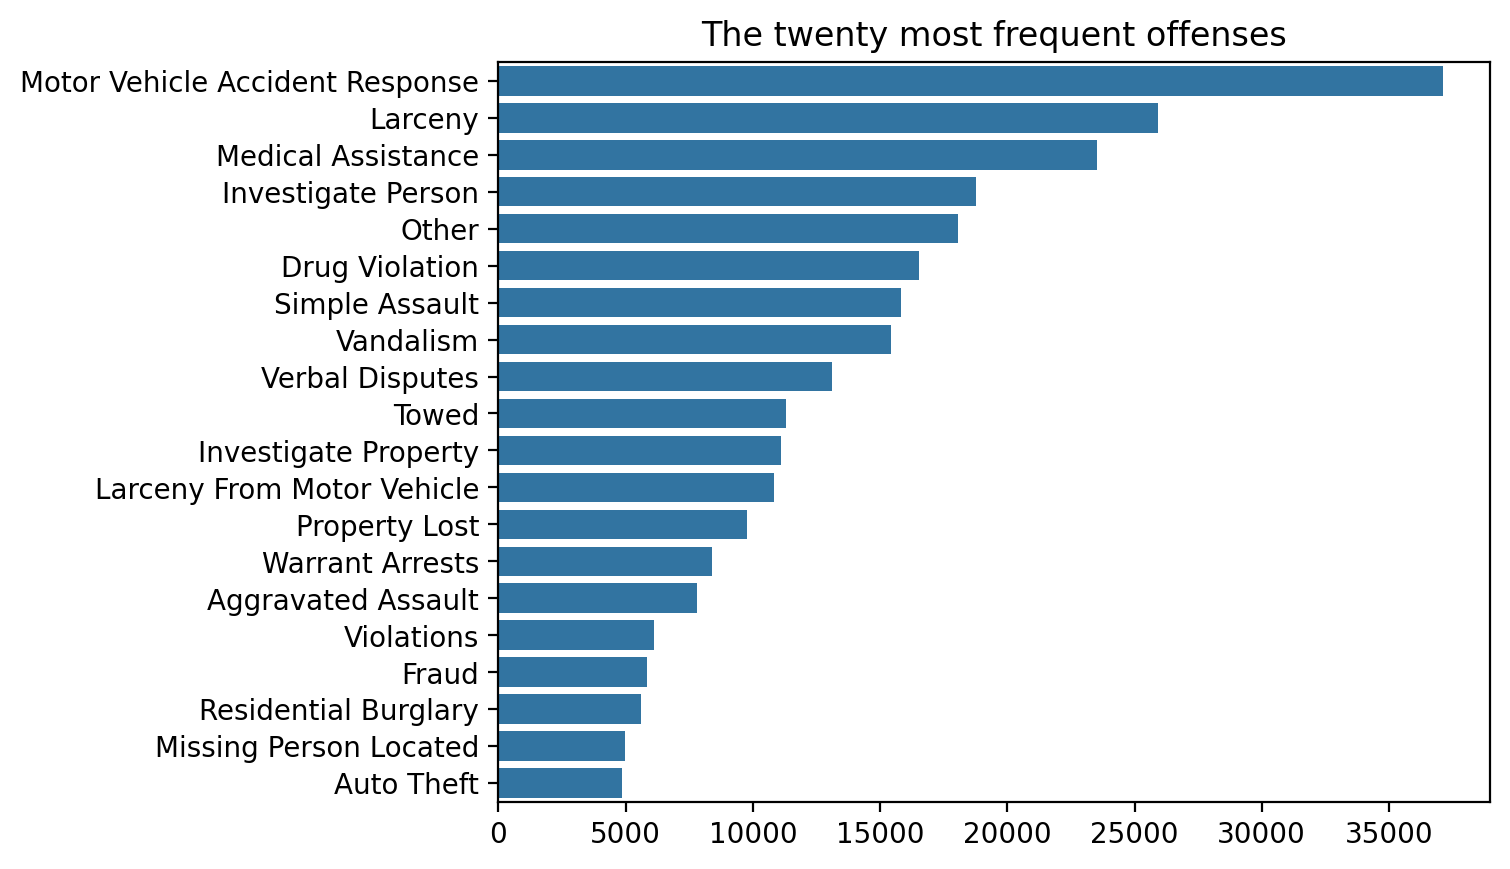

In [15]:
# Answer / Code / etc
mf_offenses = (
    df.groupby("OFFENSE_CODE_GROUP")[["INCIDENT_NUMBER"]]
    .count()
    .sort_values("INCIDENT_NUMBER", ascending=False)
    .head(20)
)

sns.barplot(data=mf_offenses, x=mf_offenses.INCIDENT_NUMBER, y=mf_offenses.index)

plt.title("The twenty most frequent offenses")
plt.xlabel("")
plt.ylabel("")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3>b) How has the number of serious crimes ('Part One') developed over the years?</h3>

</div>

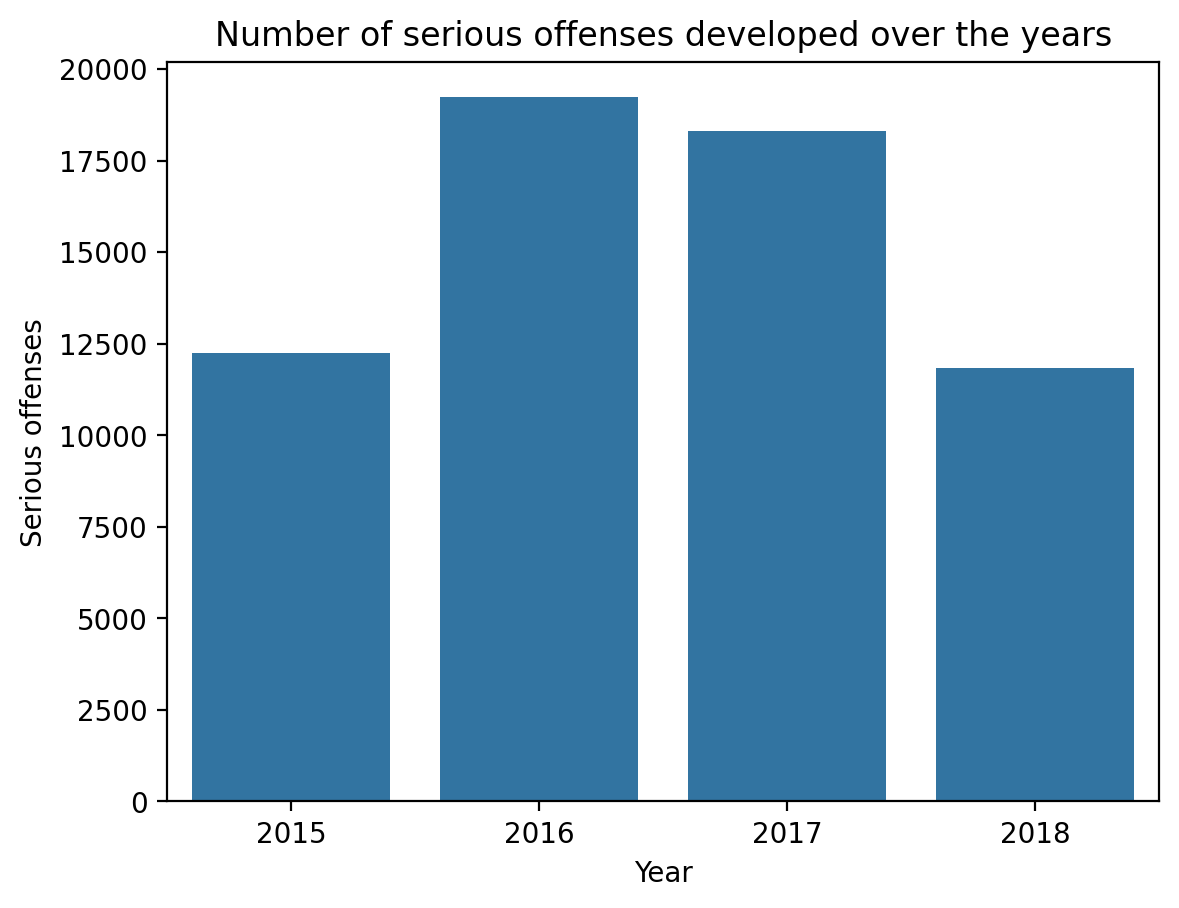

In [16]:
# Answer / Code / etc
scoy = df[df["UCR_PART"] == "Part One"].groupby("YEAR")[["INCIDENT_NUMBER"]].count()
sns.barplot(data=scoy, x=scoy.index, y=scoy.INCIDENT_NUMBER)
plt.title("Number of serious offenses developed over the years")
plt.ylabel("Serious offenses")
plt.xlabel("Year")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3>c) Why is the total number of offences (so) low in 2015 and 2018?</h3>
    
</div>

In [17]:
# Answer / Code / etc
print(df["OCCURRED_ON_DATE"].min())
print(df["OCCURRED_ON_DATE"].max())

2015-06-15 00:00:00
2018-09-03 21:25:00


<hr/> 

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 2:</h1>

<h2>In which urban areas (district), broken down by year, were most crimes committed?</h2>
    
</div>

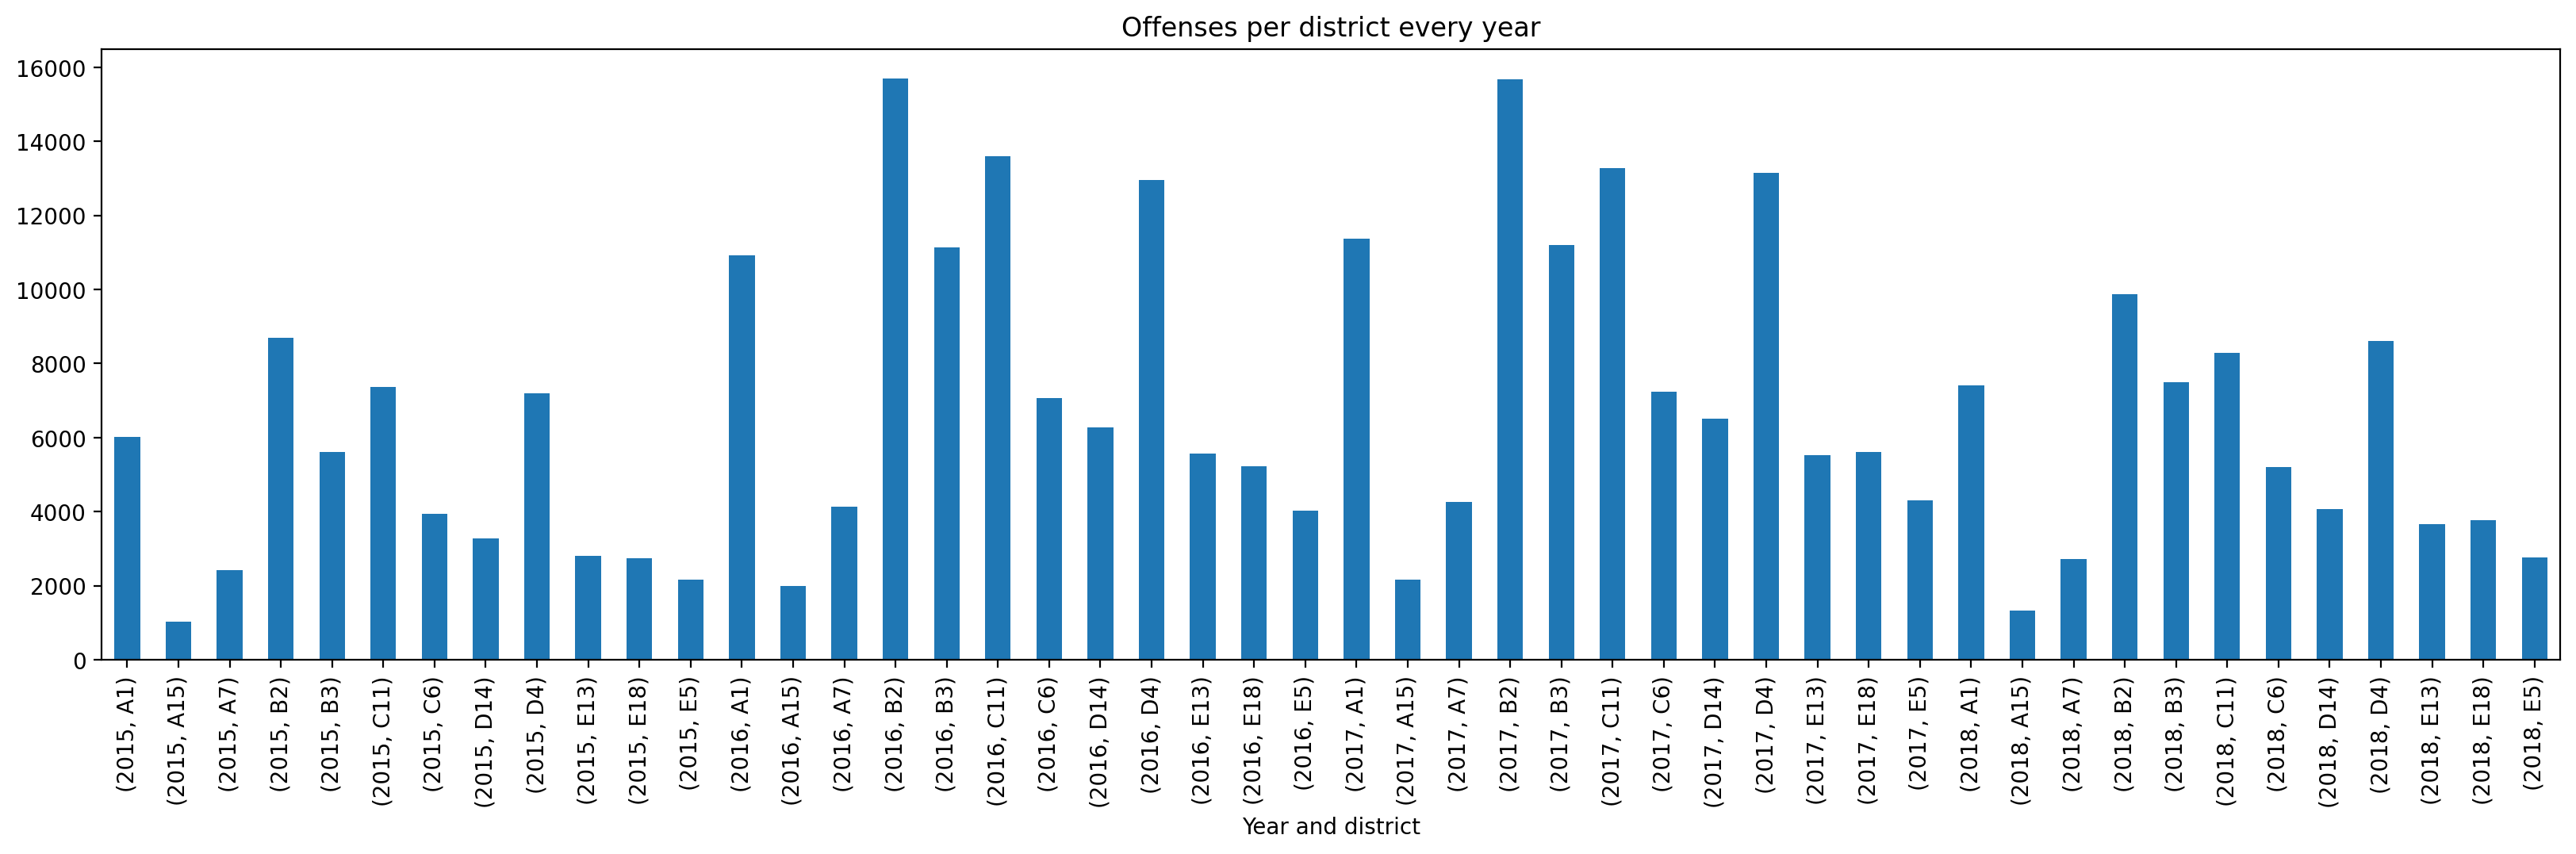

In [19]:
# Answer / Code / etc
data = df.dropna(subset=["Lat", "Long"])

g = sns.relplot(x="Lat", y="Long", col="YEAR", alpha=0.01, data=data)

g.fig.text(
    0.05,
    1.15,
    "Urban areas, broken down by year",
    fontsize=34,
    fontweight="bold",
    fontfamily="serif",
)
g.fig.text(
    0.05,
    1.05,
    "Most crimes in the eastern city part?",
    fontsize=26,
    fontweight="light",
    fontfamily="serif",
)

for axes in g.axes:
    for ax in axes:
        ax.annotate(
            "Is this the\ncrime hotspot?",
            xy=(42.36, -71.075),
            xytext=(42.36, -71.155),
            arrowprops=dict(
                facecolor="steelblue", arrowstyle="->", connectionstyle="arc3,rad=-.3"
            ),
            fontsize=10,
            fontfamily="monospace",
            ha="left",
        )


sns.despine()
plt.show()

data = df.groupby(["YEAR", "DISTRICT"])[["INCIDENT_NUMBER"]].count()
data.plot(kind="bar", figsize=(20, 5), legend=False)
plt.title("Offenses per district every year")
plt.xlabel("Year and district")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3> a) In which urban areas (district) are most serious crimes ('Part One') committed? </h3>
    
</div>

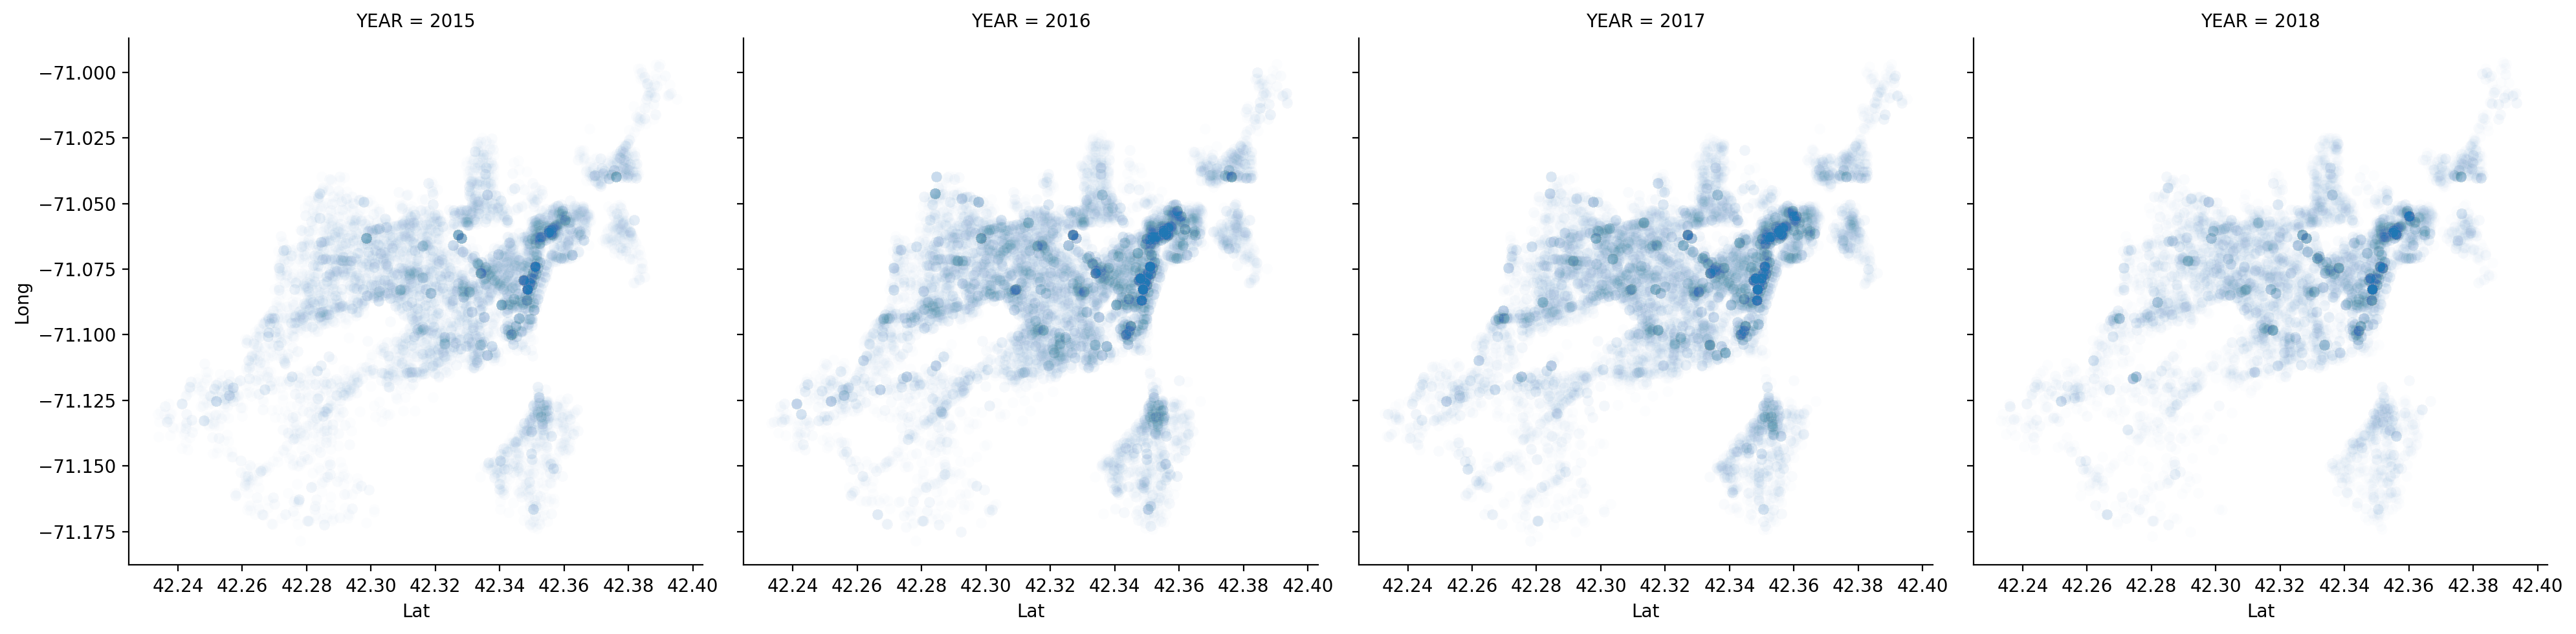

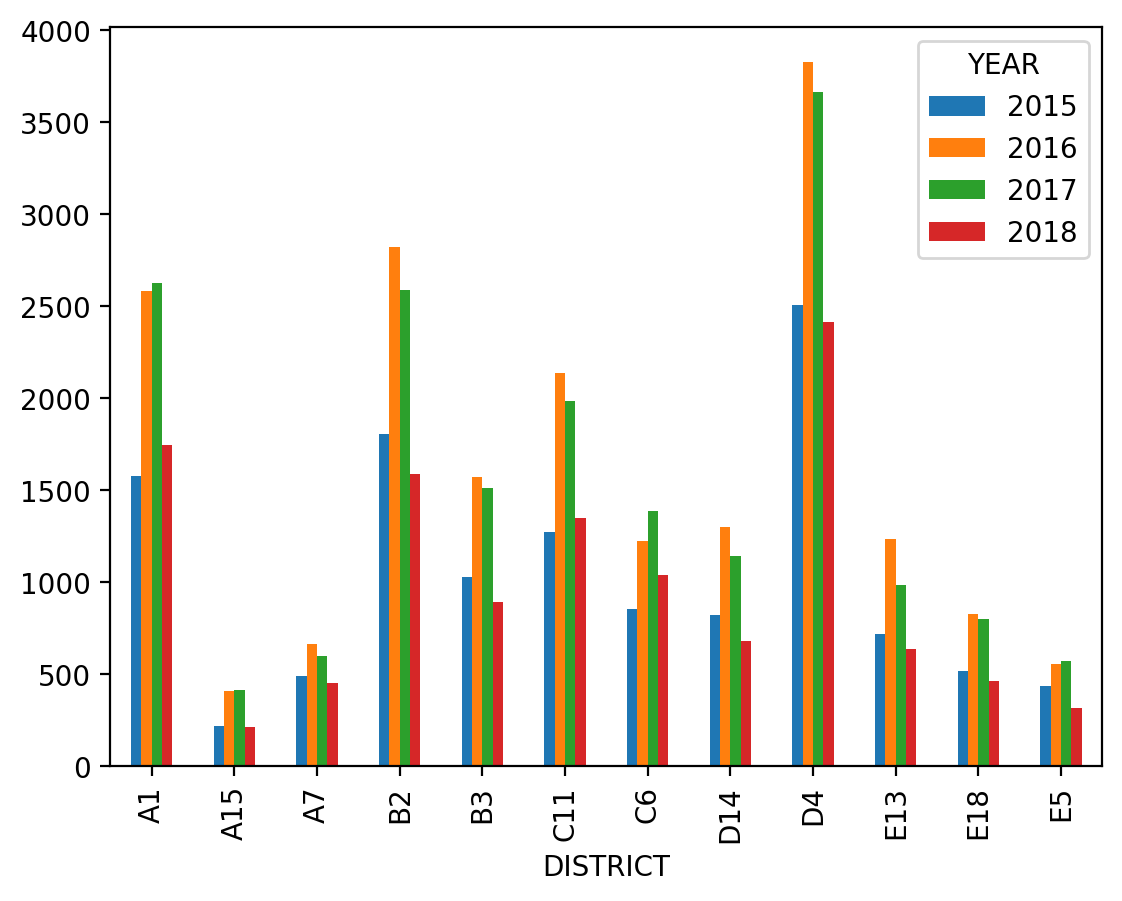

In [18]:
# Answer / Code / etc
data = df[df.UCR_PART == "Part One"]
data1 = data.dropna(subset=["Lat", "Long"])

sns.relplot(x="Lat", y="Long", col="YEAR", alpha=0.01, data=data1)
sns.despine()
plt.show()

p = data.pivot_table(
    index="DISTRICT", columns="YEAR", values="INCIDENT_NUMBER", aggfunc="count"
)
p.plot(kind="bar")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3> b) Which types of serious crimes ('Part One') occur most frequently in the urban area 'B2'? </h3>
    

</div>

In [21]:
# Answer / Code / etc
data = (
    df[(df.DISTRICT == "B2") & (df.UCR_PART == "Part One")]
    .groupby("OFFENSE_CODE_GROUP")[["INCIDENT_NUMBER"]]
    .count()
    .sort_values("INCIDENT_NUMBER", ascending=False)
)
data.plot(kind="pie", y="INCIDENT_NUMBER", legend=False)
plt.ylabel("")
plt.title("Most frequent serious crimes in district B2")
plt.show()

<hr/>

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 3:</h1>

<h2>Are there (a) times, (b) days or (c) months when more serious crimes ('Part One') occur?</h2>
    
</div>

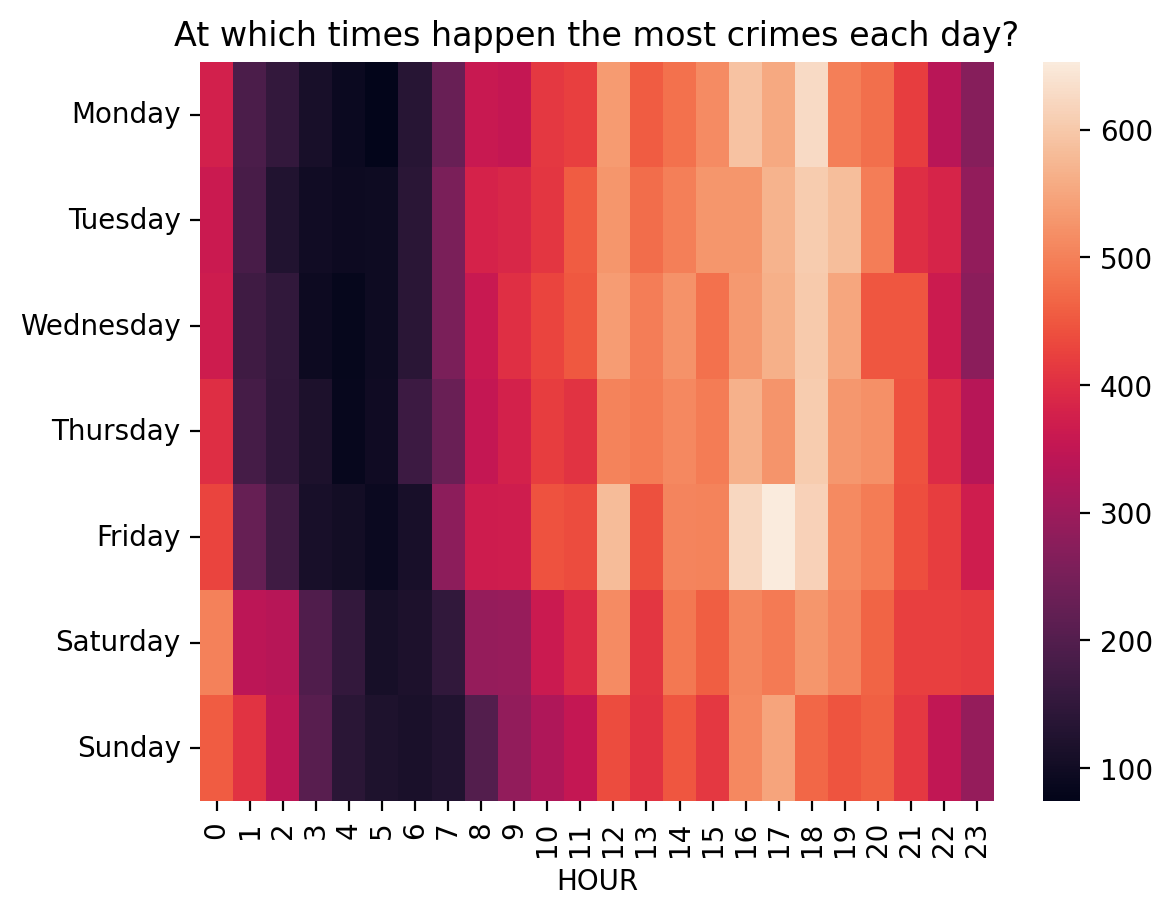

In [22]:
# Answer / Code / etc
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data = df[df.UCR_PART == "Part One"]
d = data.pivot_table(
    index="DAY_OF_WEEK", columns="HOUR", values="INCIDENT_NUMBER", aggfunc="count"
).reindex(days)

sns.heatmap(data=d)
plt.ylabel("")
plt.title("At which times happen the most crimes each day?")
plt.show()

d["Total"] = d.sum(axis=1)
sns.barplot(data=d, x=d.index, y=d.Total)
plt.xlabel("")
plt.ylabel("Serious crimes")
plt.title("Serious crimes each day")
plt.show()

data = data.groupby("MONTH")[["INCIDENT_NUMBER"]].count()
data.plot(kind="bar", legend=False, title="Serious crimes each month")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3> a) Do crimes tend to occur at night or during the day?</h3>
    
</div>

In [23]:
# Answer / Code / etc
# See heatmap before

<div class="alert alert-block alert-success" style="margin-top: 20px">

<h3> b) When are the most police officers needed?</h3>
    
</div>

In [24]:
# Answer / Code / etc
# See graphs before

<hr/>

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h1>Key Question 4:</h1>

<h2>How has the number of shootings developed in recent years?</h2>
    
</div>

In [5]:
# Answer
shootings = df[df.SHOOTING == "Y"]
data = shootings.groupby("YEAR")["INCIDENT_NUMBER"].count()
sns.barplot(data=data)
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3> a) In which district do most shootings take place?</h3>
    
</div>

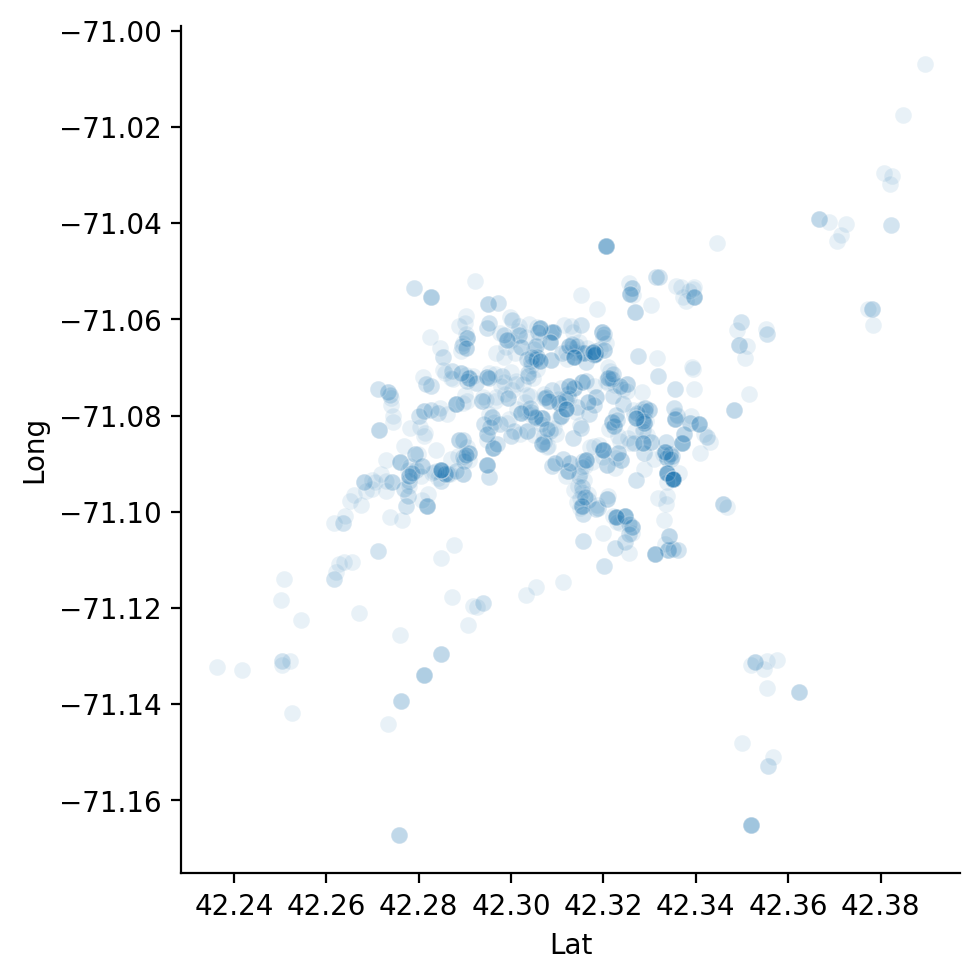

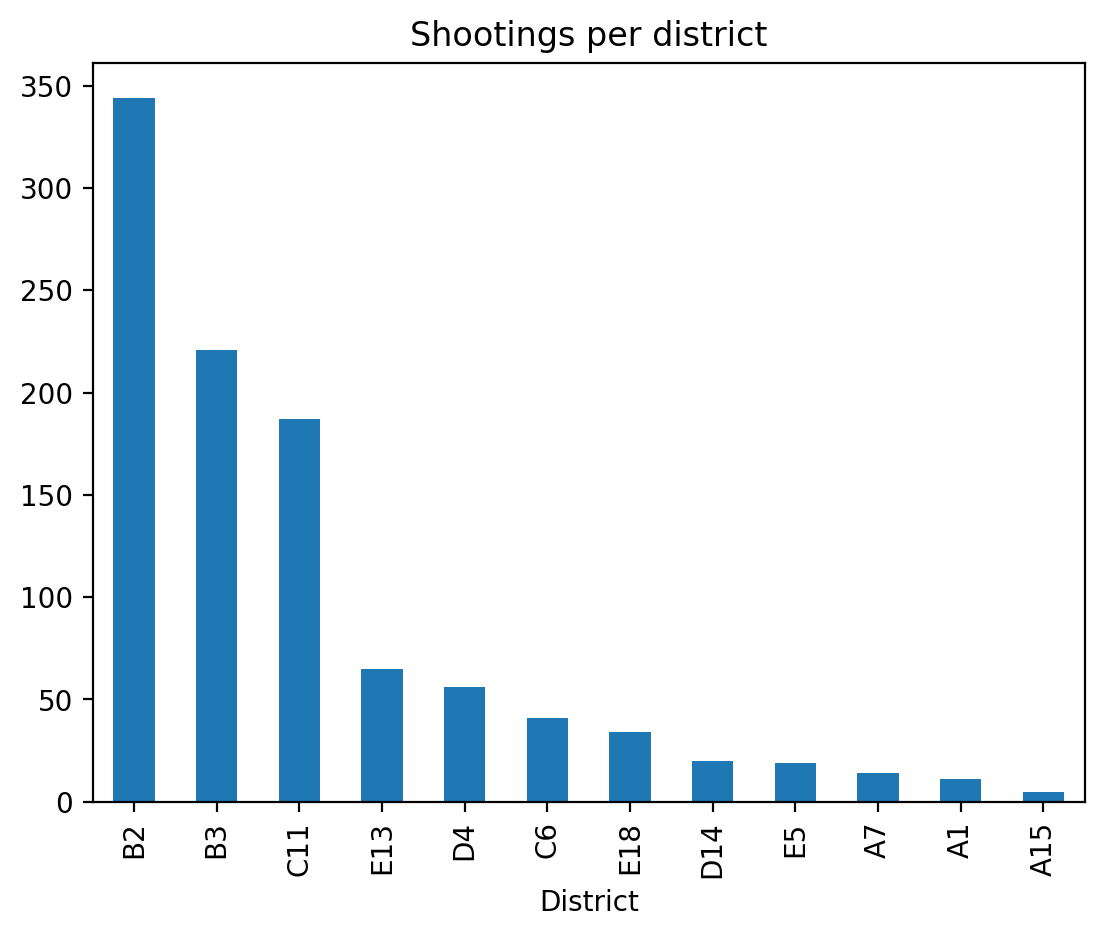

In [9]:
# Answer / Code / etc
sll = shootings.dropna(subset=["Lat", "Long"])

sns.relplot(x="Lat", y="Long", alpha=0.1, data=sll)
sns.despine()
plt.show()

s_by_district = (
    shootings.groupby("DISTRICT")[["INCIDENT_NUMBER"]]
    .count()
    .sort_values("INCIDENT_NUMBER", ascending=False)
)
s_by_district.plot(kind="bar", legend=False)
plt.title("Shootings per district")
plt.xlabel("District")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3>b) In which street do most shootings take place?</h3>
    
</div>

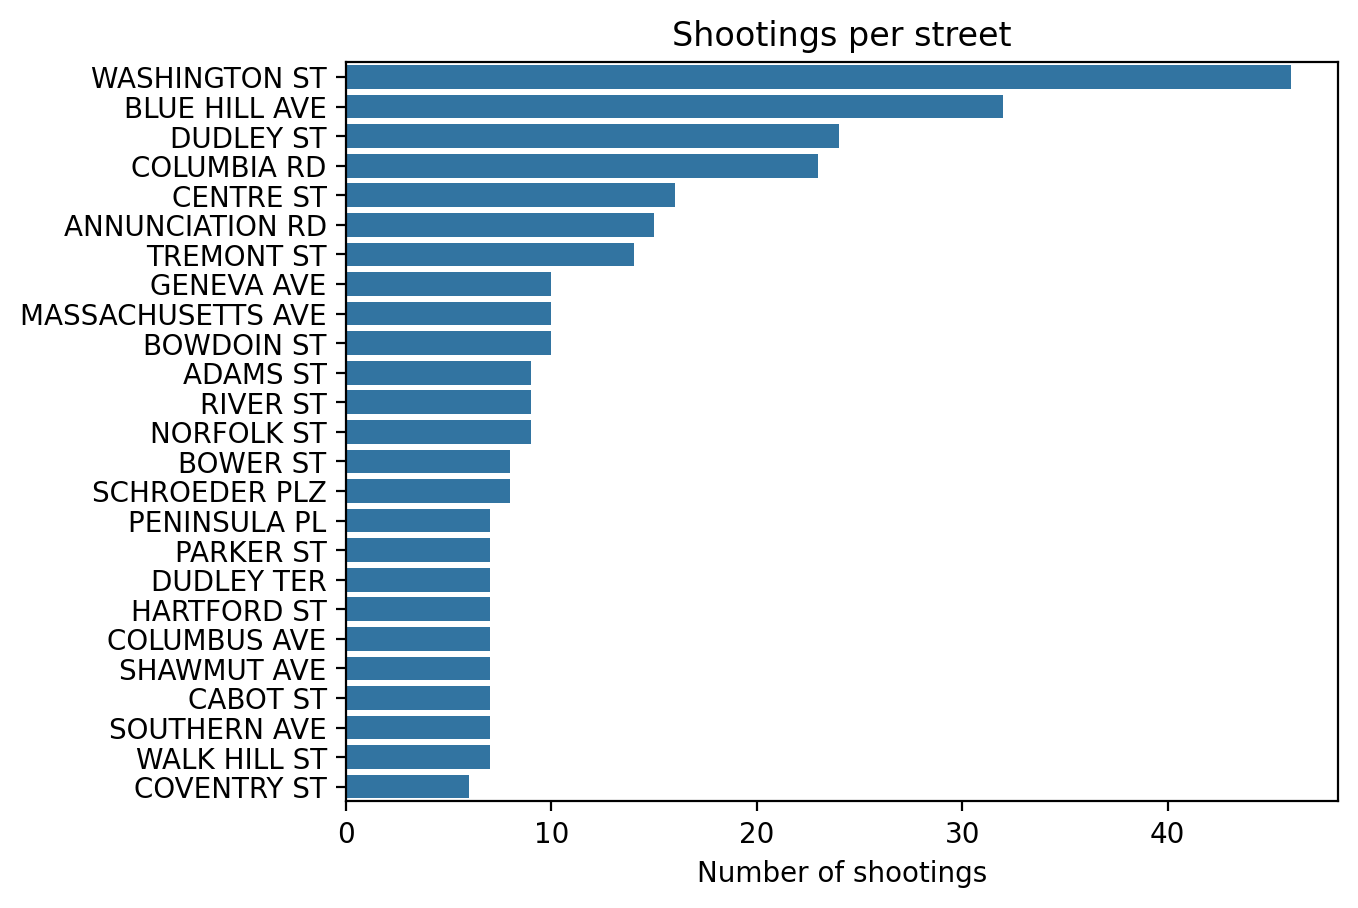

In [ ]:
# Answer / Code / etc
s_by_street = (
    shootings.groupby("STREET")[["INCIDENT_NUMBER"]]
    .count()
    .sort_values("INCIDENT_NUMBER", ascending=False)
    .head(25)
)

sns.barplot(data=s_by_street, y=s_by_street.index, x=s_by_street.INCIDENT_NUMBER)

plt.title("Shootings per street")
plt.xlabel("Number of shootings")
plt.ylabel("")
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    
<h3>c) At what times do most shootings take place?</h3>
    
</div>

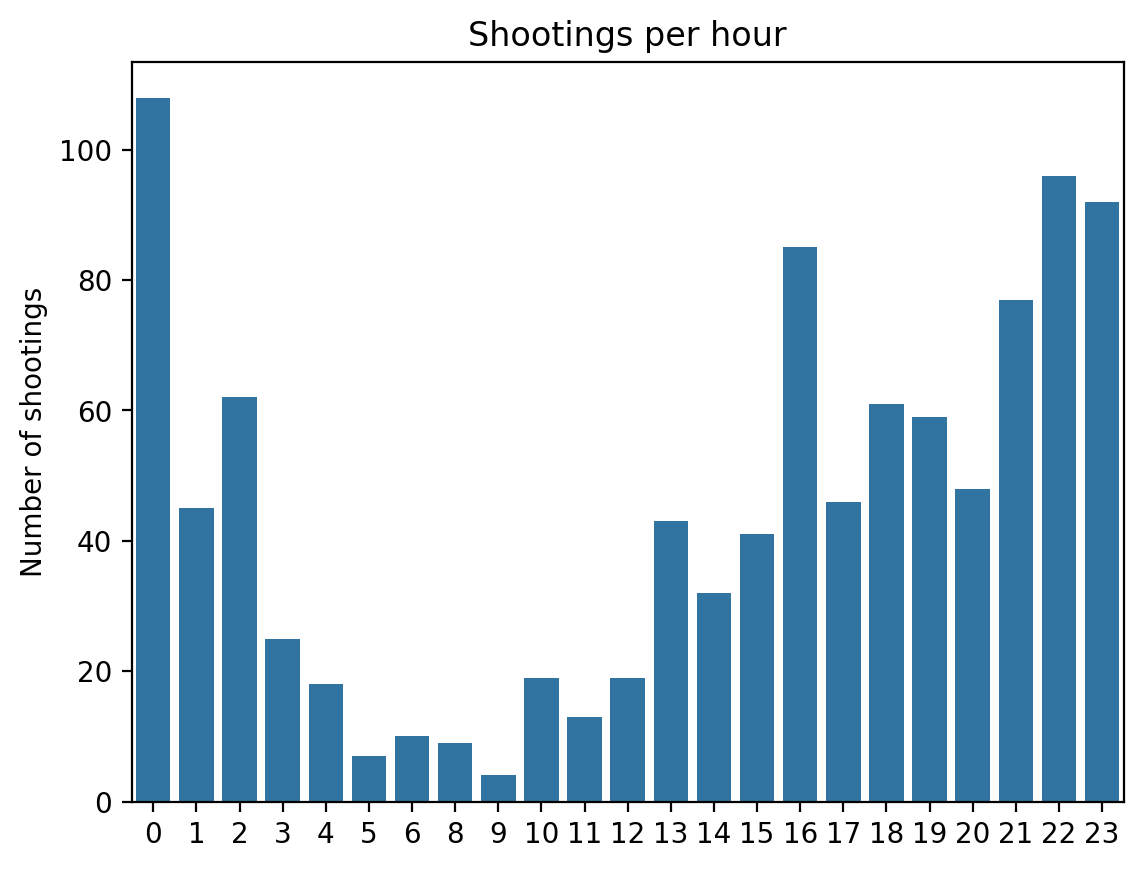

In [ ]:
# Answer / Code / etc
s_by_hour = (
    shootings.groupby("HOUR")[["INCIDENT_NUMBER"]]
    .count()
    .sort_values("INCIDENT_NUMBER", ascending=False)
)

sns.barplot(data=s_by_hour, x=s_by_hour.index, y=s_by_hour.INCIDENT_NUMBER)

plt.title("Shootings per hour")
plt.xlabel("")
plt.ylabel("Number of shootings")
plt.show()

<hr/>

# Finally: 
From these solutions: 
- **create a report in PPT, Word, html, etc.** 
- list each Key Question and its answers
- show plots, tables, etc to underline your statement

**Code is not enough to answer the key questions. It should be a visualization and explanation.**

**IF and only IF this JupsterNotebook is very clean, you may polish it, add explanations as markdown, and hand it in as a HTML report, instead**